## Question 1: Regression Analysis & Data Preprocessing – Business and Housing Use Cases

### Scenario

You are working as a data analyst for a **real estate team** that wants to predict house prices using multiple factors.

You must clean, preprocess, analyze, and model the data appropriately.

### Datasets

* **House Prices Dataset (Multiple Linear Regression – Kaggle)**
  [https://www.kaggle.com/datasets/camnugent/california-housing-prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Tasks

1. Perform **EDA** on both datasets.
2. Apply required **data preprocessing** steps:

   * Handling missing values
   * Feature encoding (if applicable)
   * Feature scaling
4. Build a **Multiple Linear Regression** model for the housing dataset.
5. Interpret regression coefficients in real-world terms.
6. Evaluate model using **R²**, **MSE**, and residual analysis.
7. State and verify assumptions of linear regression.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df["total_bedrooms"].median()

np.float64(435.0)

In [9]:
df["total_bedrooms"].fillna(435.0)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [10]:
df["total_bedrooms"].isnull().sum()

np.int64(207)

In [11]:
df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The dataset contains a categorical feature named ocean_proximity.
but machine learning models require numerical inputs.

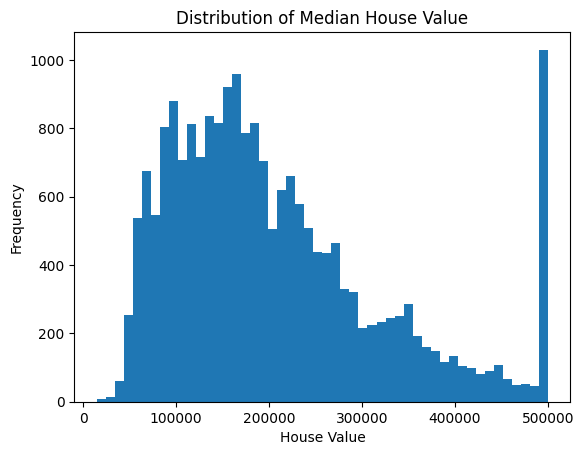

In [12]:
import matplotlib.pyplot as plt

plt.hist(df["median_house_value"], bins=50)
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

### Target Variable Analysis

The target variable in this dataset is `median_house_value`. A histogram was used to analyze its distribution. The plot shows that the data is **right-skewed**, where most houses fall under low to medium price ranges. There is also a clear spike around **500,000**, indicating a ceiling effect in the dataset.

This suggests that house prices above this value were capped. Although this may affect predictions for high-priced houses, the target variable is kept unchanged for building a baseline linear regression model, while noting this limitation.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

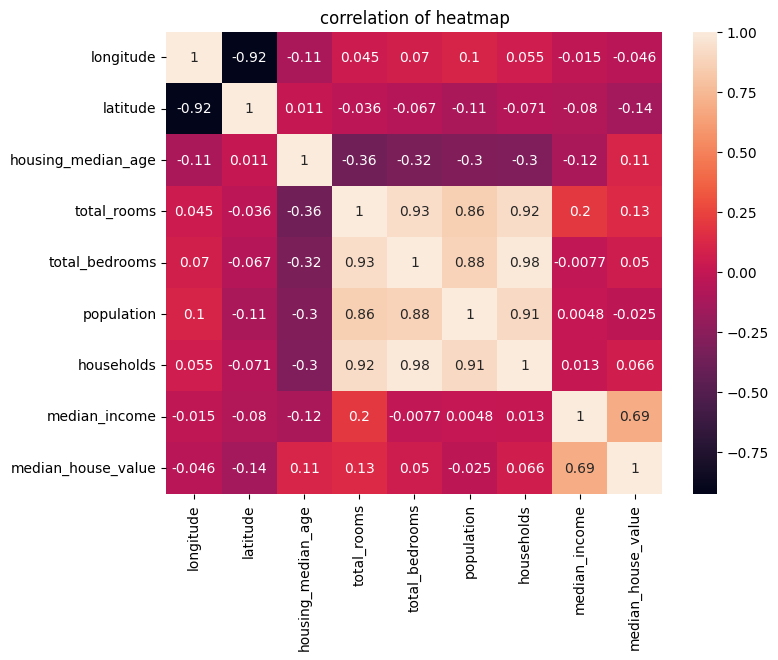

In [14]:
correlation = df.corr(numeric_only= True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation,annot = True)
plt.title("correlation of heatmap")
plt.show()

### Heatmap Conclusion

The heatmap shows that `median_income` has the strongest positive correlation with the target variable `median_house_value`.
Features such as `total_rooms`, `total_bedrooms`, `population`, and `households` are highly correlated with each other, which may cause multicollinearity.


In [15]:
df["room_per_household"] = df["total_rooms"]/ df["households"]

In [16]:
df["bedrooms_per_rooms"] = df["total_bedrooms"]/df["total_rooms"]

In [17]:
df["population_per_household"] = df["population"]/ df["households"]

In [18]:
df[[
    "room_per_household",
    "bedrooms_per_rooms",
    "population_per_household"
]].describe()

,room_per_household,bedrooms_per_rooms,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.429000,0.213039,3.070655
std,2.474173,0.057983,10.386050
min,0.846154,0.100000,0.692308
25%,4.440716,0.175427,2.429741
50%,5.229129,0.203162,2.818116
75%,6.052381,0.239821,3.282261
max,141.909091,1.000000,1243.333333


In [19]:
feature = [
    "room_per_household",
    "bedrooms_per_rooms",
    "population_per_household"
]

for col in feature:
    upper= df[col].quantile(0.99)
    lower = df[col].quantile(0.01)
    df[col]=df[col].clip(lower,upper)

In [20]:
df[feature].describe()

,room_per_household,bedrooms_per_rooms,population_per_household
count,20640.000000,20433.000000,20640.000000
mean,5.334186,0.212201,2.916367
std,1.321643,0.052962,0.732299
min,2.581133,0.124379,1.536686
25%,4.440716,0.175427,2.429741
50%,5.229129,0.203162,2.818116
75%,6.052381,0.239821,3.282261
max,10.357033,0.406625,5.394812


After applying percentile-based capping, extreme values were reduced.
The feature distributions became more stable while keeping all records intact.
This helps improve model performance by minimizing the impact of outliers.


In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'room_per_household',
       'bedrooms_per_rooms', 'population_per_household'],
      dtype='object')

In [22]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)


In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'room_per_household', 'bedrooms_per_rooms',
       'population_per_household', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [24]:
X = df.drop(["median_house_value"],axis = 1)
y = df["median_house_value"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [27]:
len(X_train), len(X_test)

(16512, 4128)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed  = imputer.transform(X_test)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test_imputed)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = lr.predict(X_test_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score
import numpy as np

In [35]:
np.isnan(X_train_scaled).sum()
np.isnan(X_test_scaled).sum()

np.int64(0)

In [36]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [37]:
mae,rmse,r2

(48745.98998923272, np.float64(66882.66649452697), 0.6586339721646985)

The Linear Regression model achieved an R² score of 0.65,
indicating that it explains around 65% of the variance in
median house values. The MAE and RMSE values suggest a
reasonable prediction error for a baseline model.


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=25,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2_score(y_test, y_pred_rf)


0.8143637368398471

### Random Forest Regression


The baseline Linear Regression model explained around 65% of the variance in house prices. To improve performance, I applied a Random Forest Regressor, which can better capture non-linear relationships in the data.

I used 300 trees with a maximum depth of 25. After training the model, the R² score increased to approximately 0.81.

This result shows that the Random Forest model explains about 81% of the variance in median house values, which is a significant improvement over the baseline model.

## Actual vs Predicted Values
This plot compares the actual house prices with the predicted values from the model. 
A closer alignment to the diagonal line indicates better model performance.


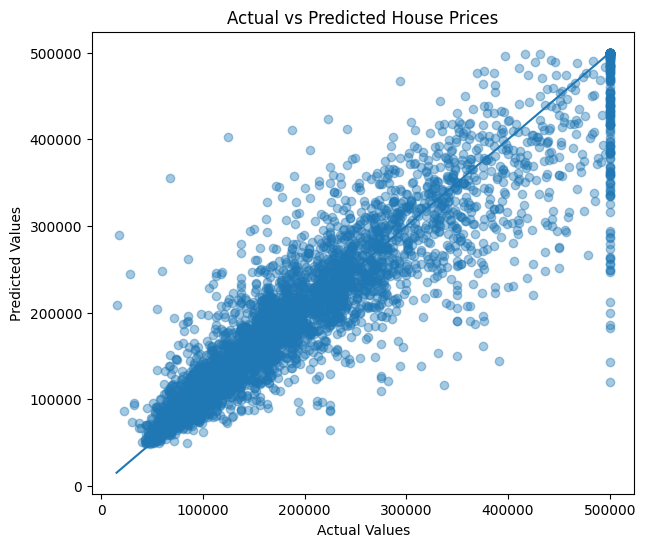

In [42]:
# Actual vs Predicted plot
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4)

# Ideal line (y = x)
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")

plt.show()
